In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=a6a9f63187dde9084430fa7306993e9e7488564369dd2ca95c0ccfdff0683233
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
# Load our Pkgs
from pyspark import SparkContext

In [ ]:
sc = SparkContext(master='local[2]')

In [ ]:
# Spark UI
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [ ]:
# Load Pkgs
from pyspark.sql import SparkSession

In [ ]:
# Spark
spark = SparkSession.builder.appName("MLwithSpark").getOrCreate()

#### WorkFlow
+ Data Prep
+ Feature Engineering
+ Build Model
+ Evaluate

# Task
+ Predict if a patient is Hep or not based parameter
+ The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.



In [ ]:
# Load our dataset
df = spark.read.csv("/content/drive/MyDrive/Colab Notebooks/Data/hcvdata.csv",header=True,inferSchema=True)

In [ ]:
# Preview Dataset
df.show(3)

+---+-------------+---+---+----+----+----+----+---+-----+----+-----+----+----+
|_c0|     Category|Age|Sex| ALB| ALP| ALT| AST|BIL|  CHE|CHOL| CREA| GGT|PROT|
+---+-------------+---+---+----+----+----+----+---+-----+----+-----+----+----+
|  1|0=Blood Donor| 32|  m|38.5|52.5| 7.7|22.1|7.5| 6.93|3.23|106.0|12.1|  69|
|  2|0=Blood Donor| 32|  m|38.5|70.3|  18|24.7|3.9|11.17| 4.8| 74.0|15.6|76.5|
|  3|0=Blood Donor| 32|  m|46.9|74.7|36.2|52.6|6.1| 8.84| 5.2| 86.0|33.2|79.3|
+---+-------------+---+---+----+----+----+----+---+-----+----+-----+----+----+
only showing top 3 rows



In [ ]:
# check for columns
print(df.columns)

['_c0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [ ]:
# Rearrange
df = df.select('Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT','Category')

In [ ]:
df.show(5)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
only showing top 5 rows



In [ ]:
# Check for datatypes
# Before InferSchema=True
df.dtypes

[('Age', 'int'),
 ('Sex', 'string'),
 ('ALB', 'string'),
 ('ALP', 'string'),
 ('ALT', 'string'),
 ('AST', 'double'),
 ('BIL', 'double'),
 ('CHE', 'double'),
 ('CHOL', 'string'),
 ('CREA', 'double'),
 ('GGT', 'double'),
 ('PROT', 'string'),
 ('Category', 'string')]

In [ ]:
# After InferSchema
df.dtypes

[('Age', 'int'),
 ('Sex', 'string'),
 ('ALB', 'string'),
 ('ALP', 'string'),
 ('ALT', 'string'),
 ('AST', 'double'),
 ('BIL', 'double'),
 ('CHE', 'double'),
 ('CHOL', 'string'),
 ('CREA', 'double'),
 ('GGT', 'double'),
 ('PROT', 'string'),
 ('Category', 'string')]

In [ ]:
# Check for the Schema
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- ALB: string (nullable = true)
 |-- ALP: string (nullable = true)
 |-- ALT: string (nullable = true)
 |-- AST: double (nullable = true)
 |-- BIL: double (nullable = true)
 |-- CHE: double (nullable = true)
 |-- CHOL: string (nullable = true)
 |-- CREA: double (nullable = true)
 |-- GGT: double (nullable = true)
 |-- PROT: string (nullable = true)
 |-- Category: string (nullable = true)



In [ ]:
# Descriptive summary
print(df.describe().show())

+-------+------------------+----+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-------------+
|summary|               Age| Sex|              ALB|               ALP|               ALT|              AST|               BIL|               CHE|              CHOL|             CREA|              GGT|             PROT|     Category|
+-------+------------------+----+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-------------+
|  count|               615| 615|              615|               615|               615|              615|               615|               615|               615|              615|              615|              615|          615|
|   mean| 47.40813008130081|NULL|41.62019543973941| 68.2839195979899

In [ ]:
# Value Count
df.groupBy('Category').count().show()

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|       0=Blood Donor|  533|
|         3=Cirrhosis|   30|
|          2=Fibrosis|   21|
|0s=suspect Blood ...|    7|
|         1=Hepatitis|   24|
+--------------------+-----+



#### Feature Engineering
+ Numberical Values
+ Vectorization
+ Scaling

In [ ]:
df.show(5)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
only showing top 5 rows



In [ ]:
import pyspark.ml

In [ ]:
dir(pyspark.ml)

['Estimator',
 'Model',
 'Pipeline',
 'PipelineModel',
 'PredictionModel',
 'Predictor',
 'TorchDistributor',
 'Transformer',
 'UnaryTransformer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'classification',
 'clustering',
 'common',
 'evaluation',
 'feature',
 'fpm',
 'image',
 'linalg',
 'param',
 'pipeline',
 'recommendation',
 'regression',
 'stat',
 'torch',
 'tree',
 'tuning',
 'util',
 'wrapper']

In [ ]:
# Load ML Pkgs
from pyspark.ml.feature import VectorAssembler,StringIndexer

In [ ]:
df.show(4)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+
only showing top 4 rows



In [ ]:
# Unique Values for Sex
df.select('Sex').distinct().show()

+---+
|Sex|
+---+
|  m|
|  f|
+---+



In [ ]:
# Convert the string into numerical code
# label encoding
genderEncoder = StringIndexer(inputCol='Sex',outputCol='Gender').fit(df)

In [ ]:
df = genderEncoder.transform(df)

In [ ]:
df.show(5)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Gender|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|   0.0|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|   0.0|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+
only showing top 5 rows



In [ ]:
# Encoding for Category
# Label Encoding
catEncoder = StringIndexer(inputCol='Category',outputCol='Target').fit(df)
df = catEncoder.transform(df)

In [ ]:
df.show(5)

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Gender|Target|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|   0.0|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|   0.0|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|   0.0|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|   0.0|   0.0|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|   0.0|   0.0|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+------+
only showing top 5 rows



In [ ]:
# Get the labels
catEncoder.labels

['0=Blood Donor',
 '3=Cirrhosis',
 '1=Hepatitis',
 '2=Fibrosis',
 '0s=suspect Blood Donor']

In [ ]:
# IndexToString
from pyspark.ml.feature import IndexToString

In [ ]:
converter = IndexToString(inputCol='Target',outputCol='orig_cat')

In [ ]:
converted_df = converter.transform(df)

In [ ]:
converted_df.show()

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+------+-------------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Gender|Target|     orig_cat|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+------+-------------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|   0.0|0=Blood Donor|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|   0.0|0=Blood Donor|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|   0.0|0=Blood Donor|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|   0.0|   0.0|0=Blood Donor|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|   0.0|   0.0|0=Blood Donor|
| 32|  m|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|  74|0=Blood Donor|   0.0|   0.0|0=Blood Donor|
| 32|  m|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|0=B

In [ ]:
### Feature
df.show()

+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+------+
|Age|Sex| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|     Category|Gender|Target|
+---+---+----+----+----+----+----+-----+----+-----+----+----+-------------+------+------+
| 32|  m|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|  69|0=Blood Donor|   0.0|   0.0|
| 32|  m|38.5|70.3|  18|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|0=Blood Donor|   0.0|   0.0|
| 32|  m|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|0=Blood Donor|   0.0|   0.0|
| 32|  m|43.2|  52|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|0=Blood Donor|   0.0|   0.0|
| 32|  m|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|0=Blood Donor|   0.0|   0.0|
| 32|  m|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|  74|0=Blood Donor|   0.0|   0.0|
| 32|  m|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|0=Blood Donor|   0.0|   0.0|
| 32|  m|42.2|41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|0=Blood Donor|   0.0|   0.0|
| 32|  m|5

In [ ]:
print(df.columns)

['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category', 'Gender', 'Target']


In [ ]:
df.dtypes

[('Age', 'int'),
 ('Sex', 'string'),
 ('ALB', 'string'),
 ('ALP', 'string'),
 ('ALT', 'string'),
 ('AST', 'double'),
 ('BIL', 'double'),
 ('CHE', 'double'),
 ('CHOL', 'string'),
 ('CREA', 'double'),
 ('GGT', 'double'),
 ('PROT', 'string'),
 ('Category', 'string'),
 ('Gender', 'double'),
 ('Target', 'double')]

In [ ]:
df2 = df.select('Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target')

In [ ]:
df2.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Gender: double (nullable = false)
 |-- ALB: string (nullable = true)
 |-- ALP: string (nullable = true)
 |-- ALT: string (nullable = true)
 |-- AST: double (nullable = true)
 |-- BIL: double (nullable = true)
 |-- CHE: double (nullable = true)
 |-- CHOL: string (nullable = true)
 |-- CREA: double (nullable = true)
 |-- GGT: double (nullable = true)
 |-- PROT: string (nullable = true)
 |-- Target: double (nullable = false)



In [ ]:
# df2.fillna(0,subset=['col1'])

In [ ]:
df2 = df2.toPandas().replace('NA',0).astype(float)

In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
# Convert To PySpark Dataframe
new_df = spark.createDataFrame(df2)

In [ ]:
new_df.show()

+----+------+----+----+----+----+----+-----+----+-----+----+----+------+
| Age|Gender| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+
|32.0|   0.0|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|
|32.0|   0.0|38.5|70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|
|32.0|   0.0|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|   0.0|
|32.0|   0.0|43.2|52.0|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|   0.0|
|32.0|   0.0|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|   0.0|
|32.0|   0.0|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|74.0|   0.0|
|32.0|   0.0|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|   0.0|
|32.0|   0.0|42.2|41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|   0.0|
|32.0|   0.0|50.9|65.5|23.2|21.2| 6.9| 8.69| 4.1| 83.0|13.7|71.3|   0.0|
|32.0|   0.0|42.4|86.3|20.3|20.0|35.2| 5.46|4.45| 81.0|15.9|69.9|   0.0|
|32.0|   0.0|44.3|52.3|21.7|22.4|17.2| 4.15|3.57| 7

In [ ]:
# Check For DTYpes and Schema
new_df.printSchema()

root
 |-- Age: double (nullable = true)
 |-- Gender: double (nullable = true)
 |-- ALB: double (nullable = true)
 |-- ALP: double (nullable = true)
 |-- ALT: double (nullable = true)
 |-- AST: double (nullable = true)
 |-- BIL: double (nullable = true)
 |-- CHE: double (nullable = true)
 |-- CHOL: double (nullable = true)
 |-- CREA: double (nullable = true)
 |-- GGT: double (nullable = true)
 |-- PROT: double (nullable = true)
 |-- Target: double (nullable = true)



In [ ]:
required_features = ['Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

In [ ]:
# VectorAsm
vec_assembler = VectorAssembler(inputCols=required_features,outputCol='features')

In [ ]:
vec_df = vec_assembler.transform(new_df)

In [ ]:
vec_df.show(5)

+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
| Age|Gender| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|            features|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
|32.0|   0.0|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|[32.0,0.0,38.5,52...|
|32.0|   0.0|38.5|70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|[32.0,0.0,38.5,70...|
|32.0|   0.0|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|   0.0|[32.0,0.0,46.9,74...|
|32.0|   0.0|43.2|52.0|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|   0.0|[32.0,0.0,43.2,52...|
|32.0|   0.0|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|   0.0|[32.0,0.0,39.2,74...|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
only showing top 5 rows



### Train,Test Split

In [ ]:
train_df,test_df = vec_df.randomSplit([0.7,0.3])

In [ ]:
train_df.count()

430

In [ ]:
train_df.show(4)

+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
| Age|Gender| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|            features|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
|32.0|   0.0|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|[32.0,0.0,38.5,52...|
|32.0|   0.0|38.5|70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|[32.0,0.0,38.5,70...|
|32.0|   0.0|43.2|52.0|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|   0.0|[32.0,0.0,43.2,52...|
|32.0|   0.0|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|   0.0|[32.0,0.0,46.3,41...|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+--------------------+
only showing top 4 rows



#### Model Building
+ Pyspark.ml: DataFrame
+ Pyspark.mllib: RDD /Legacy

In [ ]:
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier

In [ ]:
# Logist Model
lr = LogisticRegression(featuresCol='features',labelCol='Target')

In [ ]:
lr_model = lr.fit(train_df)

In [ ]:
y_pred = lr_model.transform(test_df)

In [ ]:
y_pred.show()

+----+------+----+-----+----+----+----+-----+----+-----+----+----+------+--------------------+--------------------+--------------------+----------+
| Age|Gender| ALB|  ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|            features|       rawPrediction|         probability|prediction|
+----+------+----+-----+----+----+----+-----+----+-----+----+----+------+--------------------+--------------------+--------------------+----------+
|32.0|   0.0|39.2| 74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|   0.0|[32.0,0.0,39.2,74...|[9.57440963352479...|[0.99995909810212...|       0.0|
|32.0|   0.0|41.6| 43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|74.0|   0.0|[32.0,0.0,41.6,43...|[2.00339070678741...|[0.03975485474251...|       2.0|
|32.0|   0.0|42.2| 41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|   0.0|[32.0,0.0,42.2,41...|[6.88506229223357...|[0.99242171036652...|       0.0|
|32.0|   0.0|42.4| 86.3|20.3|20.0|35.2| 5.46|4.45| 81.0|15.9|69.9|   0.0|[32.0,0.0,42.4,86...|[9.75975652970970.

In [ ]:
print(y_pred.columns)

['Age', 'Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Target', 'features', 'rawPrediction', 'probability', 'prediction']


In [ ]:
y_pred.select('target','rawPrediction', 'probability', 'prediction').show()

+------+--------------------+--------------------+----------+
|target|       rawPrediction|         probability|prediction|
+------+--------------------+--------------------+----------+
|   0.0|[9.57440963352479...|[0.99995909810212...|       0.0|
|   0.0|[2.00339070678741...|[0.03975485474251...|       2.0|
|   0.0|[6.88506229223357...|[0.99242171036652...|       0.0|
|   0.0|[9.75975652970970...|[0.99996566448854...|       0.0|
|   0.0|[7.96179335154131...|[0.99874627786961...|       0.0|
|   0.0|[12.4824083992904...|[0.99994902449126...|       0.0|
|   0.0|[10.3533600944032...|[0.99998104458150...|       0.0|
|   0.0|[5.18911195910698...|[0.92895813425063...|       0.0|
|   0.0|[9.77160129330784...|[0.99989637203363...|       0.0|
|   0.0|[11.9675539013905...|[0.99999466614096...|       0.0|
|   0.0|[11.1011042658392...|[0.99995040782801...|       0.0|
|   0.0|[4.72519707998245...|[0.76893421671695...|       0.0|
|   0.0|[9.90691498449147...|[0.99996252328014...|       0.0|
|   0.0|

#### Model Evaluation

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# How to Check For Accuracy
multi_evaluator = MulticlassClassificationEvaluator(labelCol='Target',metricName='accuracy')

In [ ]:
multi_evaluator.evaluate(y_pred)

0.9027027027027027

In [ ]:
# Precision,F1 Score,Recall : Classification Report

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
lr_metric = MulticlassMetrics(y_pred['target', 'prediction'].rdd)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
dir(lr_metric)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_java_model',
 '_sc',
 'accuracy',
 'call',
 'confusionMatrix',
 'fMeasure',
 'falsePositiveRate',
 'logLoss',
 'precision',
 'recall',
 'truePositiveRate',
 'weightedFMeasure',
 'weightedFalsePositiveRate',
 'weightedPrecision',
 'weightedRecall',
 'weightedTruePositiveRate']

In [ ]:
print("Accuracy",lr_metric.accuracy)

Accuracy 0.9027027027027027


In [ ]:
print("Precision",lr_metric.precision(1.0))
print("Recall",lr_metric.recall(1.0))
print("F1Score",lr_metric.fMeasure(1.0))

Precision 0.5
Recall 0.5714285714285714
F1Score 0.5333333333333333


In [ ]:
dir(lr_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_call_java',
 '_checkThresholdConsistency',
 '_copyValues',
 '_copy_params',
 '_create_from_java_class',
 '_create_params_from_java',
 '_defaultParamMap',
 '_dummy',
 '_empty_java_param_map',
 '_from_java',
 '_is_protocol',
 '_java_obj',
 '_make_java_param_pair',
 '_new_java_array',
 '_new_java_obj',
 '_paramMap',
 '_params',
 '_randomUID',
 '_resetUid',
 '_resolveParam',
 '_set',
 '_setDefault',
 '_shouldOwn',
 '_testOwnParam',
 '_to_java',
 '_transfer_param_map_from_java',
 '_t

In [ ]:
# Saving Model
lr_model.save("lr_model_30")

lr_model.write().save("mylr_model")

##Regression

In [ ]:
new_df.show()

+----+------+----+----+----+----+----+-----+----+-----+----+----+------+
| Age|Gender| ALB| ALP| ALT| AST| BIL|  CHE|CHOL| CREA| GGT|PROT|Target|
+----+------+----+----+----+----+----+-----+----+-----+----+----+------+
|32.0|   0.0|38.5|52.5| 7.7|22.1| 7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|
|32.0|   0.0|38.5|70.3|18.0|24.7| 3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|
|32.0|   0.0|46.9|74.7|36.2|52.6| 6.1| 8.84| 5.2| 86.0|33.2|79.3|   0.0|
|32.0|   0.0|43.2|52.0|30.6|22.6|18.9| 7.33|4.74| 80.0|33.8|75.7|   0.0|
|32.0|   0.0|39.2|74.1|32.6|24.8| 9.6| 9.15|4.32| 76.0|29.9|68.7|   0.0|
|32.0|   0.0|41.6|43.3|18.5|19.7|12.3| 9.92|6.05|111.0|91.0|74.0|   0.0|
|32.0|   0.0|46.3|41.3|17.5|17.8| 8.5| 7.01|4.79| 70.0|16.9|74.5|   0.0|
|32.0|   0.0|42.2|41.9|35.8|31.1|16.1| 5.82| 4.6|109.0|21.5|67.1|   0.0|
|32.0|   0.0|50.9|65.5|23.2|21.2| 6.9| 8.69| 4.1| 83.0|13.7|71.3|   0.0|
|32.0|   0.0|42.4|86.3|20.3|20.0|35.2| 5.46|4.45| 81.0|15.9|69.9|   0.0|
|32.0|   0.0|44.3|52.3|21.7|22.4|17.2| 4.15|3.57| 7

In [ ]:
required_features = ['Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

In [ ]:
assembler = VectorAssembler(inputCols=required_features,outputCol='features')

In [ ]:
assembler

VectorAssembler_a58336ca4924

In [ ]:
data_set = assembler.transform(new_df)

In [ ]:
data_set.show(3)

+----+------+----+----+----+----+---+-----+----+-----+----+----+------+--------------------+
| Age|Gender| ALB| ALP| ALT| AST|BIL|  CHE|CHOL| CREA| GGT|PROT|Target|            features|
+----+------+----+----+----+----+---+-----+----+-----+----+----+------+--------------------+
|32.0|   0.0|38.5|52.5| 7.7|22.1|7.5| 6.93|3.23|106.0|12.1|69.0|   0.0|[32.0,0.0,38.5,52...|
|32.0|   0.0|38.5|70.3|18.0|24.7|3.9|11.17| 4.8| 74.0|15.6|76.5|   0.0|[32.0,0.0,38.5,70...|
|32.0|   0.0|46.9|74.7|36.2|52.6|6.1| 8.84| 5.2| 86.0|33.2|79.3|   0.0|[32.0,0.0,46.9,74...|
+----+------+----+----+----+----+---+-----+----+-----+----+----+------+--------------------+
only showing top 3 rows



In [ ]:
final_data = data_set.select("features",'Target')

In [ ]:
final_data.show(3)

+--------------------+------+
|            features|Target|
+--------------------+------+
|[32.0,0.0,38.5,52...|   0.0|
|[32.0,0.0,38.5,70...|   0.0|
|[32.0,0.0,46.9,74...|   0.0|
+--------------------+------+
only showing top 3 rows



In [ ]:
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
train_data.show(3)

+--------------------+------+
|            features|Target|
+--------------------+------+
|[32.0,0.0,38.5,52...|   0.0|
|[32.0,0.0,38.5,70...|   0.0|
|[32.0,0.0,41.6,43...|   0.0|
+--------------------+------+
only showing top 3 rows



In [ ]:
test_data.show(3)

+--------------------+------+
|            features|Target|
+--------------------+------+
|[32.0,0.0,39.2,74...|   0.0|
|[32.0,0.0,43.2,52...|   0.0|
|[32.0,0.0,46.3,41...|   0.0|
+--------------------+------+
only showing top 3 rows



In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
lr = LinearRegression(featuresCol="features", labelCol="Target", predictionCol="predicted")

In [ ]:
lr_model = lr.fit(train_data)

In [ ]:
predictions = lr_model.transform(test_data)

In [ ]:
trainingSummary = lr_model.summary

In [ ]:
test_stats = lr_model.evaluate(test_data)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

RMSE is expressed in the same units as the dependent variable and provides a measure of the typical magnitude of the errors made by the model. A lower RMSE indicates better model performance, as it means the model's predictions are closer to the actual values.

R2 Score R2 ranges between 0 and 1. A value of 1 indicates that the model perfectly predicts the dependent variable, while a value of 0 indicates that the model does not explain any variability in the dependent variable.

Mean Square Error(MSE) - is average of square of the errors. The larger the number the larger the error. Error refers to difference between observed values y1, y2, y3 and corresponding predicted values - pred(y1), pred(y2), pred(y3). Differences are squared, so that negative and positive values do not cancel each other out

In [ ]:
# Check accuracy of linear regression model
print(f"RMSE: {test_stats.rootMeanSquaredError}")
print(f"R2: {test_stats.r2}")
print(f"MSE: {test_stats.meanSquaredError}")

RMSE: 0.7694346222203046
R2: 0.3584430614732733
MSE: 0.5920296378713028


In [ ]:
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print("Coefficients: ", coefficients)
print("Intercept: {:.3f}".format(intercept))

Coefficients:  [0.004158182679050245,0.0705100154128953,-0.018443938897933897,-0.009458143059629016,0.0048692809908346645,0.006296667191878092,2.0667664467531775e-05,0.04635385917016637,-0.07224112649642898,0.0008725003219535832,0.003677775694988532,-0.0018743225314495984]
Intercept: 0.978


---
#**6. PANDAS**
---

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Convert PySpark Dataframe to Pandas dataframe
pandas_df = new_df.toPandas()

In [ ]:
# Rows and Columns
pandas_df.shape

(615, 13)

In [ ]:
# Data Structure
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    float64
 1   Gender  615 non-null    float64
 2   ALB     615 non-null    float64
 3   ALP     615 non-null    float64
 4   ALT     615 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    615 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    615 non-null    float64
 12  Target  615 non-null    float64
dtypes: float64(13)
memory usage: 62.6 KB


In [ ]:
# Preview top 3 rows
pandas_df.head(3)

,Age,Gender,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Target
0,32.0,0.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0
1,32.0,0.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0
2,32.0,0.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0


In [ ]:
# Statistics of Pandas Dataframe
pandas_df.describe()

,Age,Gender,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Target
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,0.386992,41.552520,66.285366,28.404553,34.786341,11.396748,8.196634,5.280813,81.287805,39.533171,71.926992,0.274797
std,10.055105,0.487458,6.014807,28.112329,25.474786,33.090690,19.673150,2.205657,1.312962,49.756166,54.661071,6.130297,0.787276
min,19.000000,0.000000,0.000000,0.000000,0.000000,10.600000,0.800000,1.420000,0.000000,8.000000,4.500000,0.000000,0.000000
25%,39.000000,0.000000,38.800000,51.700000,16.400000,21.600000,5.300000,6.935000,4.580000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,0.000000,41.900000,65.300000,23.000000,25.900000,7.300000,8.260000,5.290000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,1.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000,0.000000
max,77.000000,1.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,4.000000


In [ ]:
# Checking Null values
pandas_df.isnull().sum()*100/pandas_df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

,0
Age,0.0
Gender,0.0
ALB,0.0
ALP,0.0
ALT,0.0
AST,0.0
BIL,0.0
CHE,0.0
CHOL,0.0
CREA,0.0


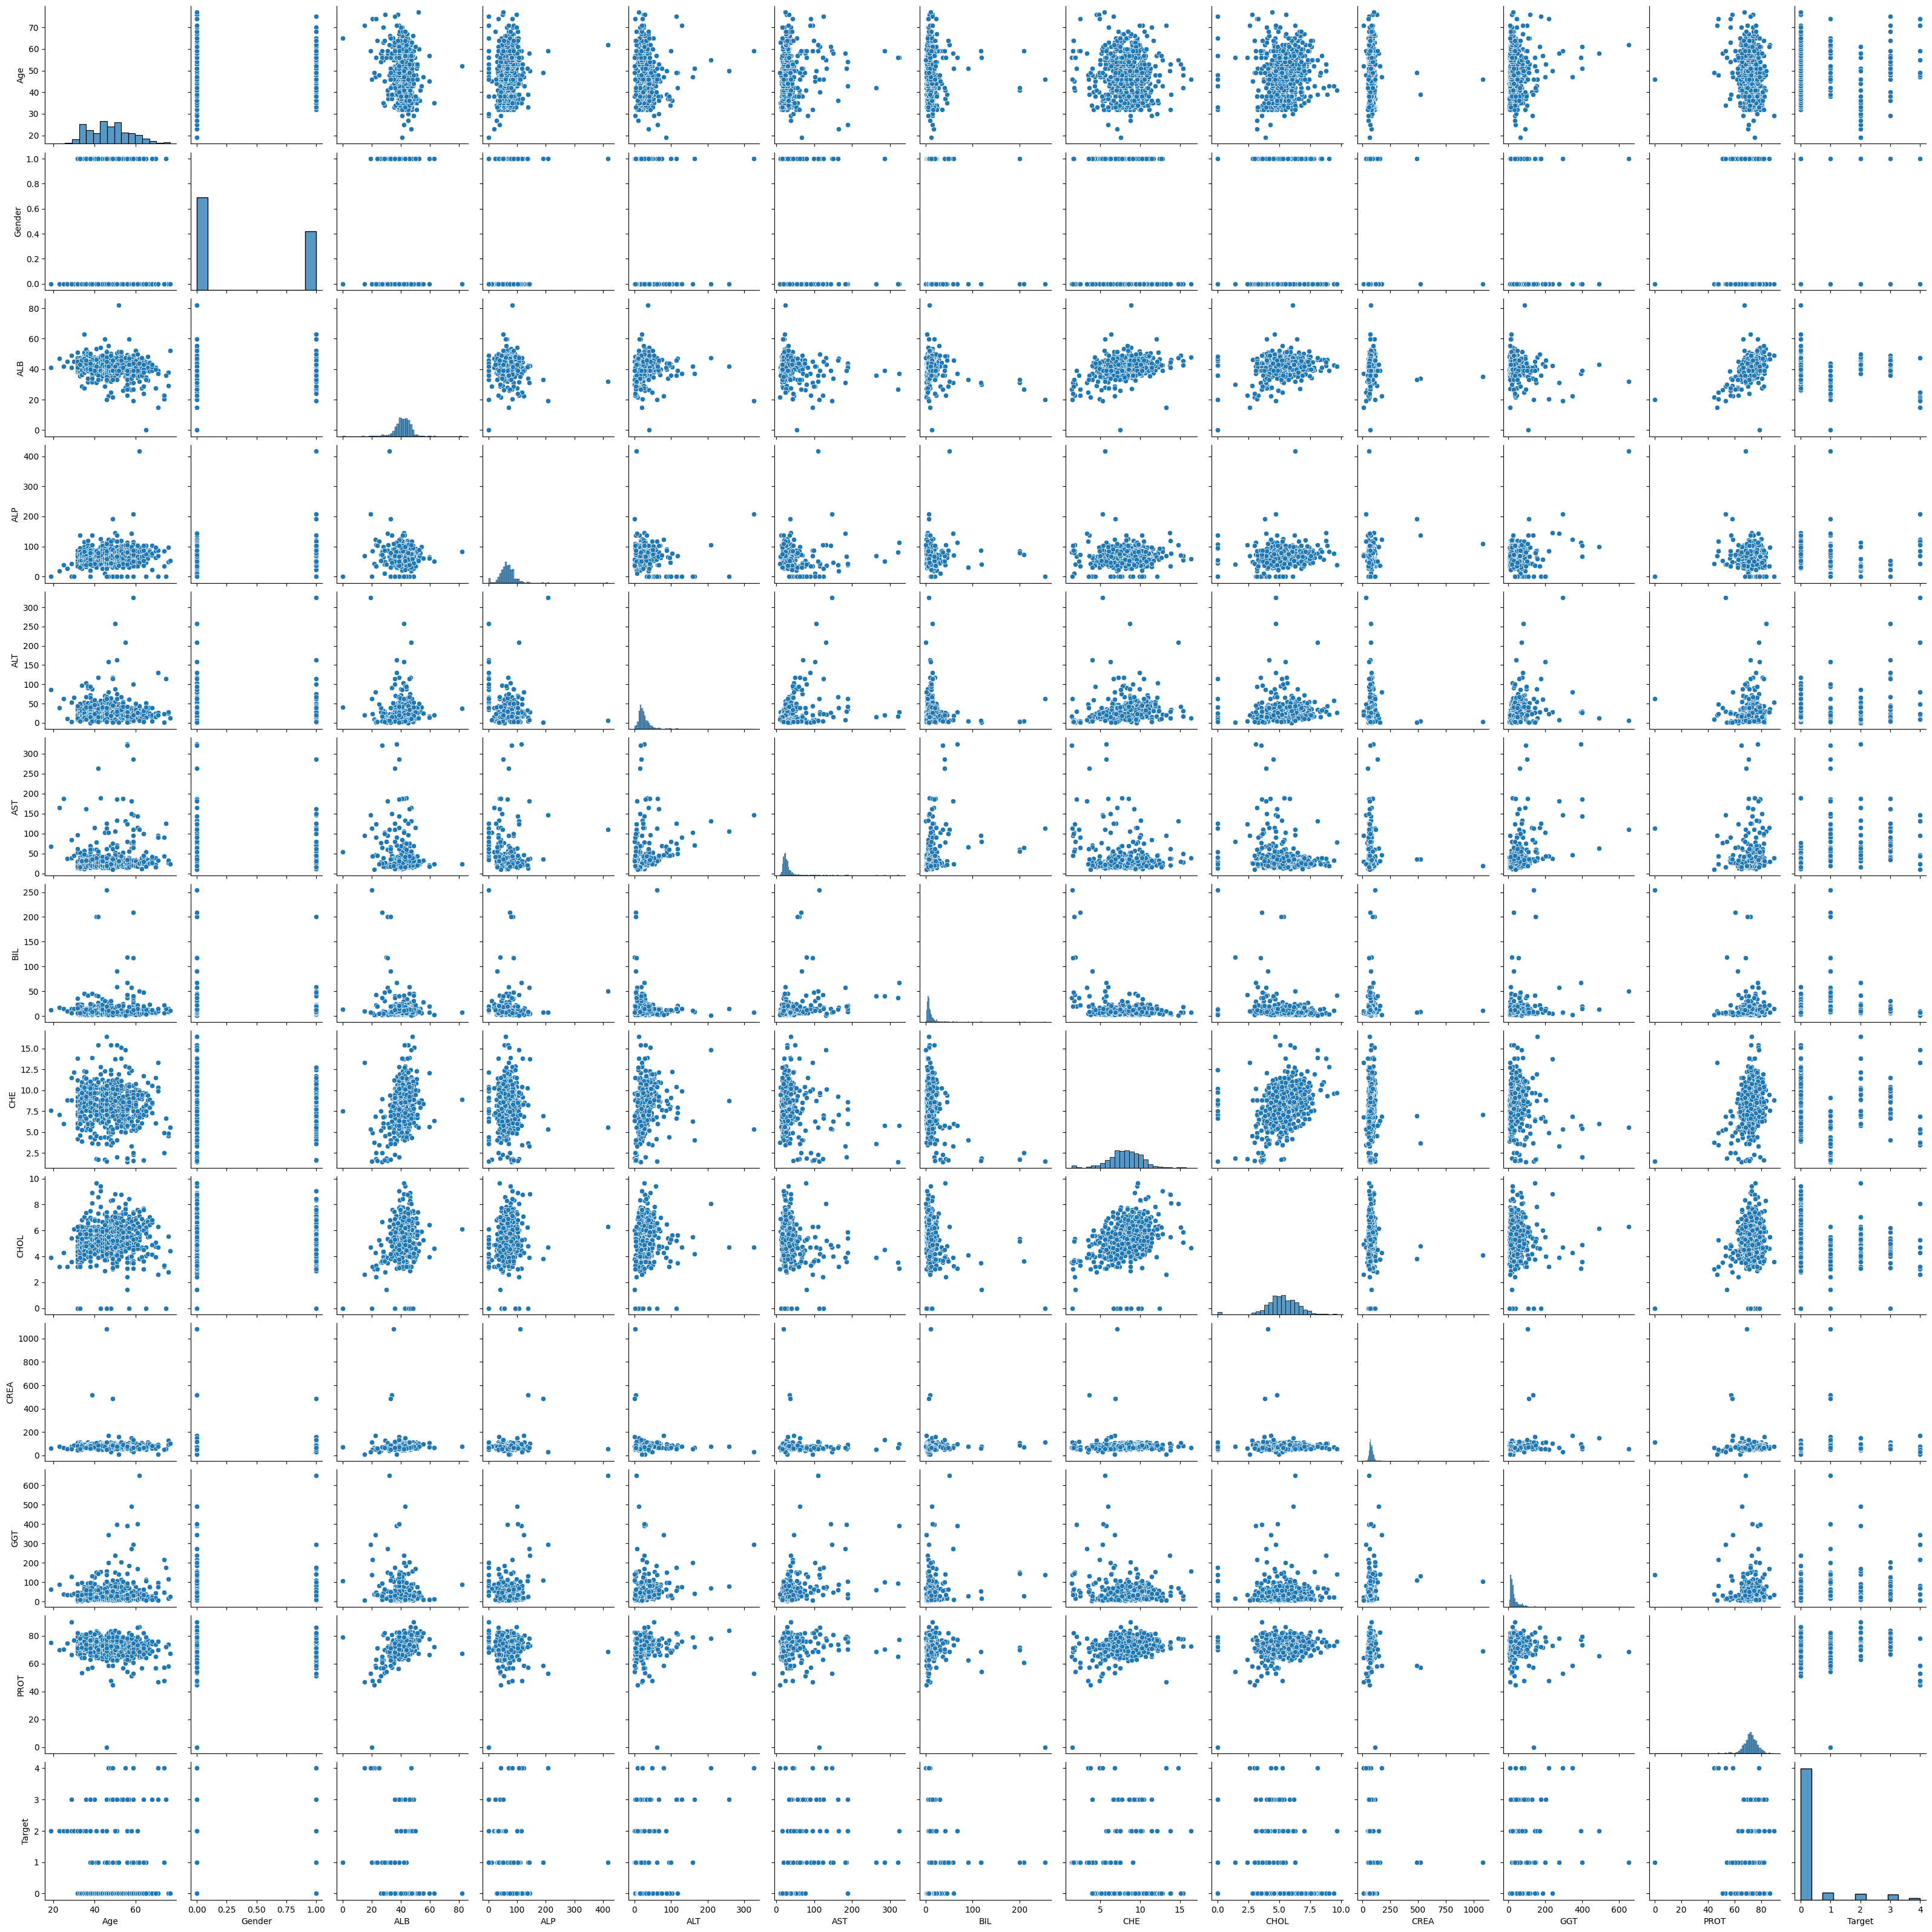

In [ ]:
sns.pairplot(pandas_df);

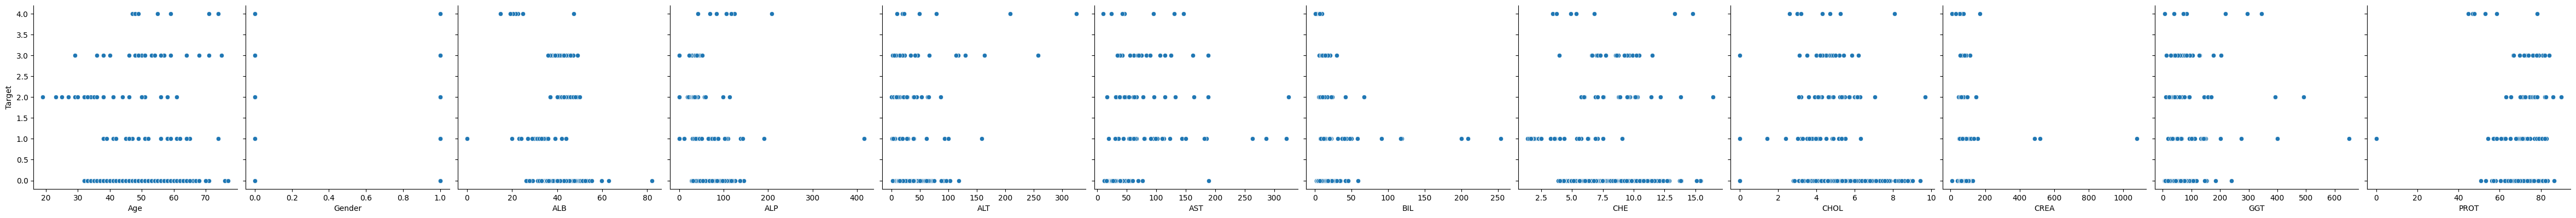

In [ ]:
# Let's see how  are related with other variables using scatter plot.
sns.pairplot(pandas_df, x_vars=['Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'], y_vars='Target', height=4, aspect=1, kind='scatter')
plt.show()

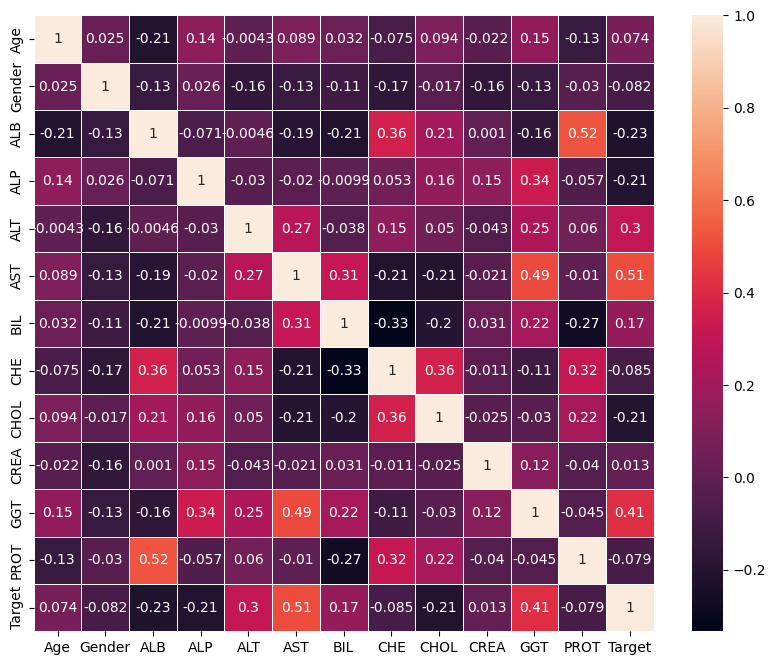

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pandas_df.corr(),linewidth=0.5, annot=True);

### Correlation
- Correlation coefficient, or simply correlation, is an index that ranges from -1 to 1.
- When value is near zero, there is no linear relationship.
- As correlation gets closer to plus or minus one, relationship is stronger.
- A value of one (or negative one) indicates a perfect linear relationship between two variables.

In [ ]:
pandas_df.corr().Target.sort_values(ascending=False)

,Target
Target,1.000000
AST,0.505251
GGT,0.412531
ALT,0.303725
BIL,0.165635
Age,0.073866
CREA,0.013178
PROT,-0.079189
Gender,-0.082339
CHE,-0.084911


### Histogram
- A great way to get started exploring a single variable is with the histogram.
- A histogram divides variable into bins, counts the data points in each bin.
- It shows bins on x-axis and counts on the y-axis.

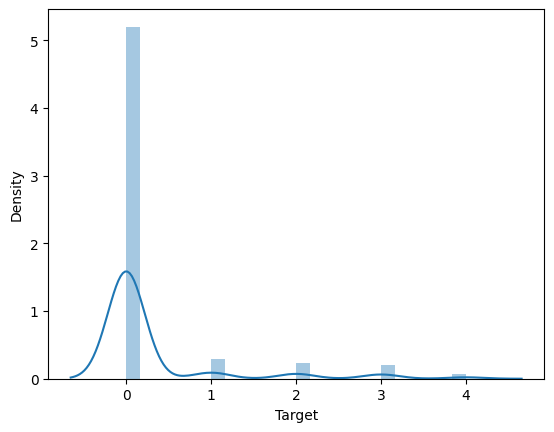

In [ ]:
sns.distplot(pandas_df.Target);

In [ ]:
# Independent variable(x) - 'bathrooms' 'bedrooms'
X = pandas_df[['Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

# Dependent variables(y) - 'square_feet'
y = pandas_df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

,Age,Gender,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
51,36.0,0.0,42.4,47.3,23.0,25.5,6.1,9.46,5.29,79.0,17.5,73.8
231,53.0,0.0,44.8,119.7,29.2,20.7,6.0,13.80,8.78,64.0,49.3,75.4
546,30.0,0.0,45.0,0.0,66.0,45.0,14.0,12.16,6.10,86.0,43.0,77.0
354,36.0,1.0,39.9,59.0,11.3,20.4,9.4,7.60,5.51,69.0,16.0,81.0
312,70.0,0.0,27.8,85.7,25.4,38.9,4.2,6.06,3.96,63.0,46.0,56.9


In [ ]:
y_train.head()

,Target
51,0.0
231,0.0
546,2.0
354,0.0
312,0.0


In [ ]:
# Creating a Linear Regression Model
lm = LinearRegression()

# Training the Model created using the 70% data assigned for training
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Find y intercept(c)and slope(m) values as below:

#To retrieve the y intercept (c):
print("Intercept : ",lm.intercept_)

#To retrieve the slope (m):
print(lm.coef_)

print("Coeffs - 'Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'", lm.coef_[0])

Intercept :  1.290418735200465
[ 0.00013011  0.05913128 -0.01613917 -0.00903365  0.00146813  0.00430347
  0.0023551   0.02328851 -0.04312494  0.00081882  0.00499602 -0.00351314]
Coeffs - 'Age','Gender', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT' 0.00013011381925257423


In [ ]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted values')

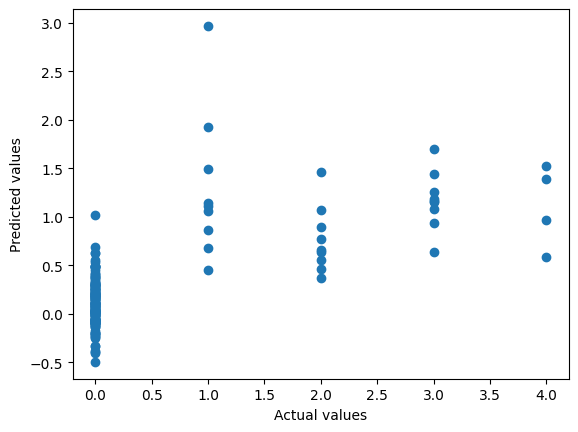

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [ ]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Variance:  0.43311662429692444
R2 score :  0.4203352575355649
MSE:  0.512340641623058


In [ ]:
spark.stop()